In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data
# Combine the data into a single dataset
combined_data= pd.merge(mouse_drug_data,clinical_trial_data, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tomor_volume_df = combined_data.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)']
volume_df=tomor_volume_df.mean()
# Convert to DataFrame
tomor_response_df=pd.DataFrame(volume_df)
# Preview DataFrame
tomor_response_df.reset_index(inplace=True)
tomor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
#tomor_volume_df['Tumor Volume (mm3)'].loc['Capomulin']

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_sem =tomor_volume_df.sem() 

# Convert to DataFrame
response_df_new=pd.DataFrame(standard_error_sem)
response_df_new.reset_index(inplace=True)
# Preview DataFrame
response_df_new.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
#minor_data_df.reset_index(inplace=True)
munging_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


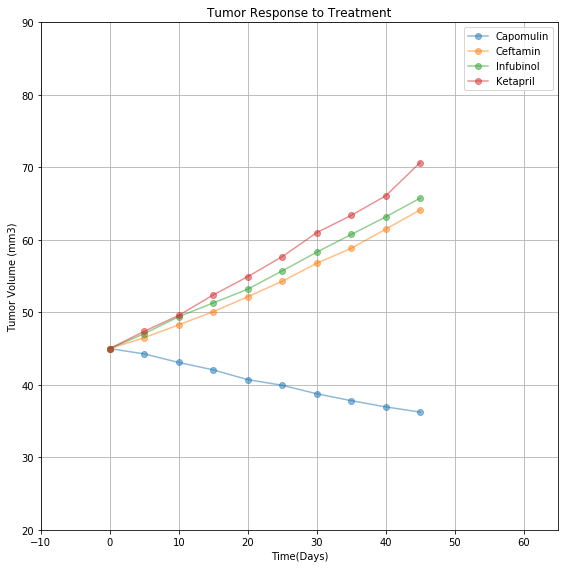

In [11]:
# Generate the Plot (with Error Bars)
cols_plot=['Capomulin','Ceftamin','Infubinol','Ketapril']
axes=munging_df[cols_plot].plot(marker='o',alpha=0.5,linestyle='-',figsize=(8,8),grid=True)

#plt.errorbar(trip.index,trip['Tumor Volume (mm3)'],yerr='sem')
plt.xlim(-10,65)
plt.ylim(20,90)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.legend(loc="best")
#Save the Figure
plt.savefig("../Images/Tumor Response to Treatment.png")

In [12]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()